In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
car = pd.read_csv('car.csv')

car.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [3]:
car.shape

(1727, 7)

In [ ]:
# renaming columns

In [5]:
car.rename(columns={'low':'safety',"small":"lug_boot",
                    "2.1":"number of persons","2":"number of doors",
                    "vhigh":"buying price","vhigh.1":"maintenance cost",
                    "unacc":"Car_Acceptability"},inplace=True)




In [6]:
#Car acceptability grouping   values

car.Car_Acceptability.unique()

array(['unacc', 'acc', 'vgood', 'good'], dtype=object)

In [7]:
car.columns

Index(['buying price', 'maintenance cost', 'number of doors',
       'number of persons', 'lug_boot', 'safety', 'Car_Acceptability'],
      dtype='object')

In [8]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   buying price       1727 non-null   object
 1   maintenance cost   1727 non-null   object
 2   number of doors    1727 non-null   object
 3   number of persons  1727 non-null   object
 4   lug_boot           1727 non-null   object
 5   safety             1727 non-null   object
 6   Car_Acceptability  1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [9]:
car.isna().sum()

buying price         0
maintenance cost     0
number of doors      0
number of persons    0
lug_boot             0
safety               0
Car_Acceptability    0
dtype: int64

As all the columns are categorical, check for unique values of each column

In [11]:
for i in car.columns:
    
    print(i)
    print(car[i].unique(),"\t",car[i].nunique())
    print("\n")

buying price
['vhigh' 'high' 'med' 'low'] 	 4


maintenance cost
['vhigh' 'high' 'med' 'low'] 	 4


number of doors
['2' '3' '4' '5more'] 	 4


number of persons
['2' '4' 'more'] 	 3


lug_boot
['small' 'med' 'big'] 	 3


safety
['med' 'high' 'low'] 	 3


Car_Acceptability
['unacc' 'acc' 'vgood' 'good'] 	 4




Check how these unique categories are distributed among the columns

In [16]:
for i in car.columns:
    
   
    
    print(car[i].value_counts())
    
    print("\n")
    print()

high     432
med      432
low      432
vhigh    431
Name: buying price, dtype: int64



high     432
med      432
low      432
vhigh    431
Name: maintenance cost, dtype: int64



3        432
4        432
5more    432
2        431
Name: number of doors, dtype: int64



4       576
more    576
2       575
Name: number of persons, dtype: int64



med      576
big      576
small    575
Name: lug_boot, dtype: int64



med     576
high    576
low     575
Name: safety, dtype: int64



unacc    1209
acc       384
good       69
vgood      65
Name: Car_Acceptability, dtype: int64





From above output, it is clear that all the columns except 'Car_Acceptability' are distributed equally among data.

Below is the graph which gives the count of unique values in column.

/home/abey/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Car_Acceptability', ylabel='count'>

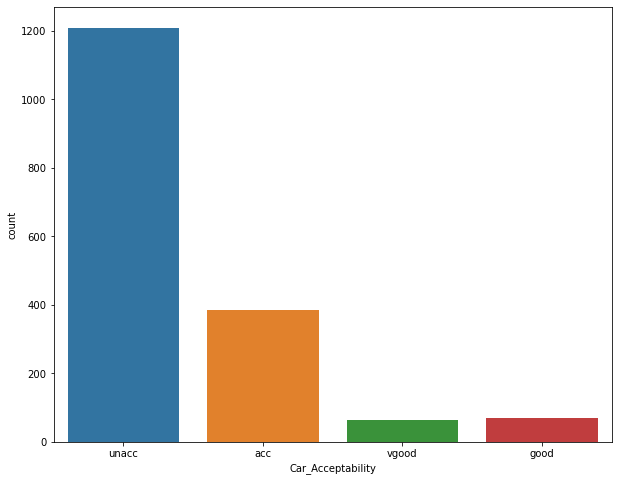

In [18]:
plt.figure(figsize=(10,8))

sns.countplot(car['Car_Acceptability'])

It can be seen from the graph that the result 'Car_Acceptability' is unbalanced with larger values of 'unacc'. So, this is an unbalanced multiclass classification problem.

I've checked how the 'Car_Acceptability' is distributed for each of the feature in our data.

/home/abey/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/abey/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/abey/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/abey/an

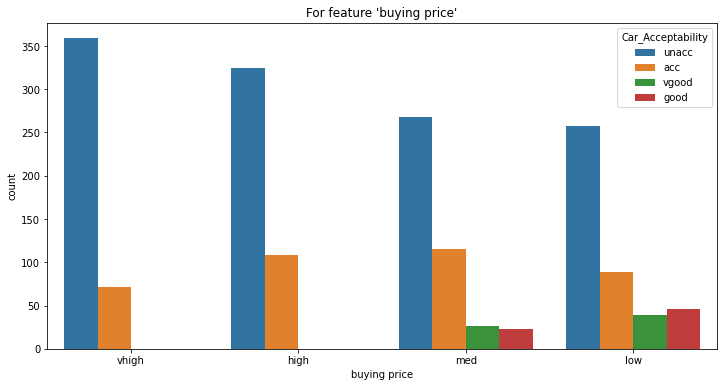

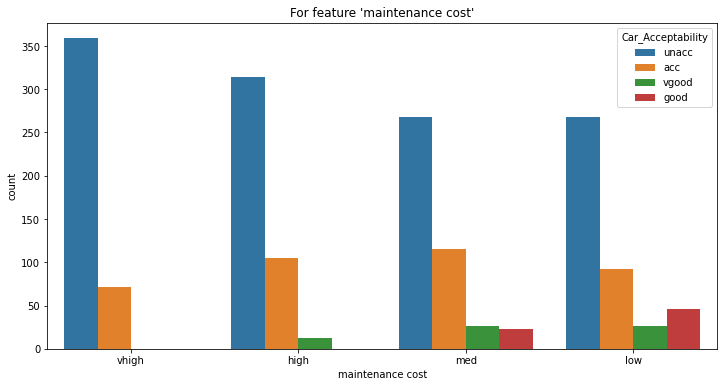

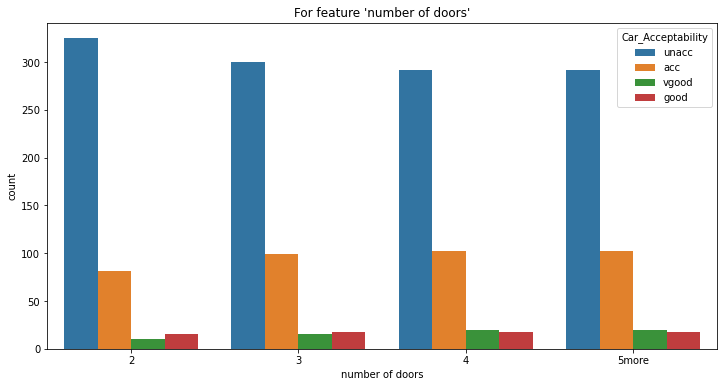

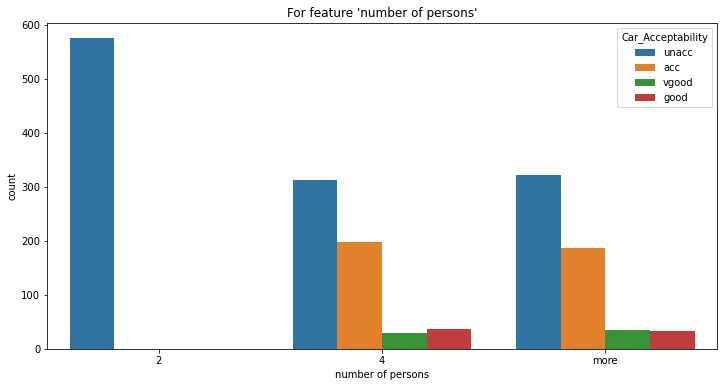

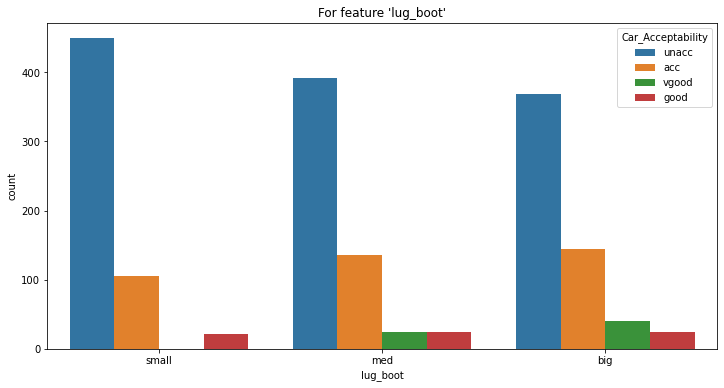

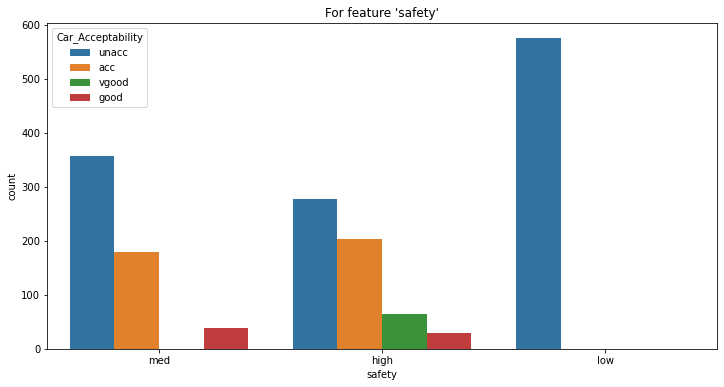

In [20]:
for i in car.columns[:-1]:
    
    plt.figure(figsize=(12,6))
    
    plt.title("For feature '%s'"%i)
    
    sns.countplot(car[i],hue=car['Car_Acceptability'])

As scikit-learn algorithms do not generally work with string values, I've converted string categories to integers.

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
le=LabelEncoder()

In [23]:
for i in car.columns:
    
    car[i]=le.fit_transform(car[i])

In [24]:
car.head()

,buying price,maintenance cost,number of doors,number of persons,lug_boot,safety,Car_Acceptability
0,3,3,0,0,2,2,2
1,3,3,0,0,2,0,2
2,3,3,0,0,1,1,2
3,3,3,0,0,1,2,2
4,3,3,0,0,1,0,2


Heatmap of the columns on dataset with each other. It shows Pearson's correlation coefficient of column w.r.t other columns.

<AxesSubplot:>

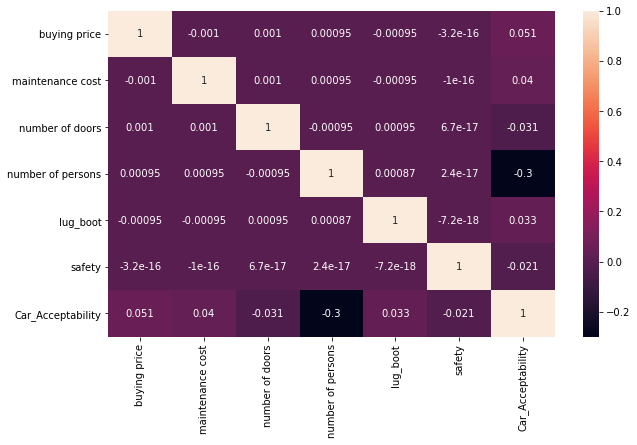

In [25]:
fig=plt.figure(figsize=(10,6))

sns.heatmap(car.corr(),annot=True)

Ignoring the diagonal values, it can be seen that most of the columns shows very weak correlation with 'class'. 'persons' column is showning a weak relation with 'class'. Other columns except 'class' shows no correlation with each other.